In [1]:
# Initial data prep section.  Read, clean and create sets.
import pandas as pd

C:\Users\S559487\AppData\Local\Temp\ipykernel_15092\1365640796.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_path = 'ADANIPORTS.csv'
df = pd.read_csv(file_path)
print(df.info())
# df.isnull().sum()
df['Trades'] = df['Trades'].fillna(0)
# df.isnull().sum()
# # print(df["Symbol"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [3]:
# Create training/test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)
print(len(train_set), len(test_set))
print(train_set.head(2))
print(test_set.head(2))

2657 665
            Date      Symbol Series  Prev Close   Open   High    Low    Last  \
2585  2018-05-09  ADANIPORTS     EQ       412.8  412.1  415.3  409.6  413.10   
895   2011-07-12  MUNDRAPORT     EQ       157.1  155.3  156.7  153.5  153.65   

       Close    VWAP   Volume      Turnover   Trades  Deliverable Volume  \
2585  413.35  412.14  1408466  5.804817e+13  24313.0              411696   
895   153.90  154.96   673388  1.043463e+13  13300.0              247680   

      %Deliverble  
2585       0.2923  
895        0.3678  
            Date      Symbol Series  Prev Close   Open    High     Low  \
2312  2017-03-31  ADANIPORTS     EQ       339.3  342.0  342.70  336.00   
926   2011-08-25  MUNDRAPORT     EQ       146.8  147.2  149.65  138.75   

        Last  Close    VWAP   Volume      Turnover   Trades  \
2312  340.90  339.6  339.02  3417463  1.158582e+14  38884.0   
926   140.75  140.4  143.68  1793336  2.576610e+13  14070.0   

      Deliverable Volume  %Deliverble  
2312    

#### 2. Pick an initial set of features for X and the target feature y.  Explain why you made this choice.
I am initially focusing on setting features for X as "Open" and the target feature y as "Close". I want to predict if the "Open" value is high then the "Close" value is also high or not. Later on I also want to add features for X "VWAP", "Volume", and "Trades" to predict the "Close" value. Based on the result I want to adjust the features to decrease the mean square and root mean squared errors.

#### 3. Do a linear regression on X and y.  Compute metrics

In [4]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha = 1.0, l1_ratio=0.5,max_iter=100000)

In [5]:
X = train_set[["Open"]]
Y = train_set["Close"]
reg.fit(X, Y)

ElasticNet(max_iter=100000)

In [6]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)

The bias is  1.4357866468126872
The feature coefficients are  [0.99373371]


1.4357866468126872 0.9937337135668036


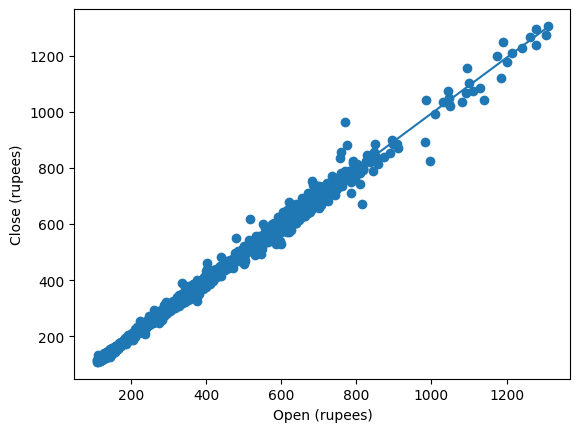

In [7]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_open = train_set[["Open"]].min().values[0]
min_close = the_line(min_open, theta0, theta1)
max_open = train_set[["Close"]].max().values[0]
max_close = the_line(max_open, theta0, theta1)
line_x = [min_open, max_open]
line_y = [min_close, max_close]

import matplotlib.pyplot as plt
plt.scatter(train_set["Open"], train_set["Close"])
plt.xlabel("Open (rupees)")
plt.ylabel("Close (rupees)")
plt.plot(line_x, line_y)
plt.show()

In [8]:
print(reg.score(X,Y))

0.9956225573037771


In [9]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

from math import sqrt
rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

mean squared error is  162.16811868820628
The root mean squared error is  12.734524674608247


#### 4. Comment on the Results
99% of the predicated value is determined by the input. But mean squared error and root mean squared error are a bit high which can be reduced by adding more features.

#### 5. See if you can do better.

In [10]:
# See if you can do better.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha = 1.0, l1_ratio=0.5,max_iter=100000)
X = train_set[["Open","VWAP","Volume","Trades"]]
Y = train_set["Close"]
reg.fit(X, Y)
print(reg.score(X,Y))
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

0.9994189415659077
mean squared error is  21.52607347343868
The root mean squared error is  4.63961997079919


#### Observation
By adding features "VWAP","Volume","Trades" model performance increased from 99.5% to 99.9% and also mean squared error dropped from 162.16 to 21.52 and root mean squared error dropped from 12.73 to 4.63. So adding additional parameters benefits the model.

#### Adding more features to verify if I can reduce mean square and root mean square error

In [17]:
# See if you can do better.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha = 1.0, l1_ratio=0.5,max_iter=100000)
X = train_set[["Open","VWAP","Volume","Trades","Low","Last","Prev Close"]]
Y = train_set["Close"]
reg.fit(X, Y)
print(reg.score(X,Y))
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

0.9999355795018
mean squared error is  2.3865420344755255
The root mean squared error is  1.5448436925707163


#### Observation
"Low", "Last" ,"Prev Close" on adding features reduced mean square and root mean square errors. Lets verify if we add again few more features impact mean square and root mean square errors or not.

In [18]:
# See if you can do better.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha = 1.0, l1_ratio=0.5,max_iter=100000)
X = train_set[["Open","VWAP","Volume","Trades","Low","Last","Prev Close","Deliverable Volume","Turnover","Trades"]]
Y = train_set["Close"]
reg.fit(X, Y)
print(reg.score(X,Y))
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

0.999935620148912
mean squared error is  2.3850362087839856
The root mean squared error is  1.5443562441302154


#### Observation
"Deliverable Volume","Turnover","Trades" adding these features have no impact on the mean square and root mean square values. Hence I want to include only "Open","VWAP","Volume","Trades","Low","Last","Prev Close" features for X.

#### 6. Do a final evaluation with the test set.

In [19]:
# 6. Do a final evaluation with the test set.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha = 1.0, l1_ratio=0.5,max_iter=100000)
X = test_set[["Open","VWAP","Volume","Trades","Low","Last","Prev Close"]]
Y = test_set["Close"]
reg.fit(X, Y)
print(reg.score(X,Y))
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

0.9999503574232372
mean squared error is  1.8901133262619518
The root mean squared error is  1.3748139242319128


#### Look at the parameters you found and discuss what you have learned
Model has almost similar performance on the test_data as it has performed of the train_data. Mean square and root mean square has reduced a bit because of the data size.